# KNN

Can be used for continuous labels but isn't very efficient.

It's best used for classification.

Supervised learning algorithm (labels already exist).

Assigns a label to new data based on the distance between the old data and the new data.

The K stands for the amount of closest points considered for the prediction.

**How to break a tie**?

Always use an odd number of K's.

Randomly break the tie.

Choose the nearest class point.

**How do we find the best K value**?

Elbow graph method.

Or cross validation (grid search). The problem with this method is that it'll choose the K with lowest error and could choose an overly complex model.

**How do we measure distance**?

There are different metrics: Minkowski, euclidean, manhattan, chebyshev.

**Should we scale distance**?

Features can have vastly different value ranges.

It's probably best to ***always scale*** data when running a KNN model

### Coding KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


### Visualization

We want to figure out if a KNN model would be good for this problem.

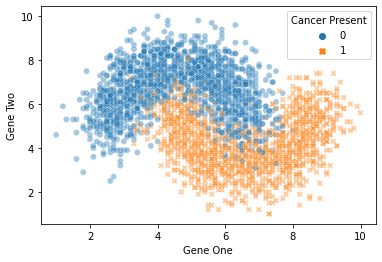

In [15]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.4, style='Cancer Present');
#plt.xlim(2,6)
#plt.ylim(4,8);

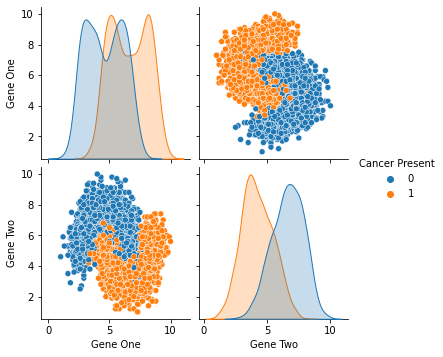

In [14]:
sns.pairplot(data=df,hue='Cancer Present');

### Model creation

Train, test, split + scale + model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()

In [23]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# use help(KNeighborsClassifier) on new models to see all the parameters and options
knn_model = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_pred = knn_model.predict(scaled_X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [31]:
confusion_matrix(y_test, y_pred)

array([[420,  50],
       [ 47, 383]])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [34]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

### Choosing best K

Also learning how to use the **pipeline object**

#### Elbow graph

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
# this loop creates a list of test error rates with the desired range of k
test_error_rates = []

for k in range(1,30):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(scaled_X_train, y_train)
        
        y_pred_test = knn_model.predict(scaled_X_test)
        
        test_error = 1-accuracy_score(y_test,y_pred_test)
        
        test_error_rates.append(test_error)

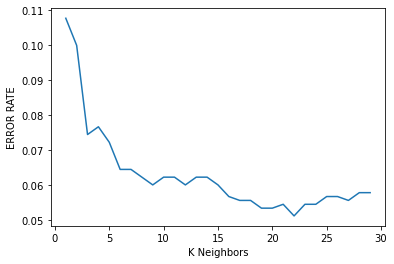

In [42]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors');

**Use of pipeline**

In [43]:
# pipeline --> gridsearch cv

scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn',knn)]

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipe = Pipeline(operations)

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
k_values = list(range(1,20))

In [49]:
param_grid = {'knn__n_neighbors':k_values}

In [50]:
full_cv_classifier = GridSearchCV(pipe, param_grid,cv=5,scoring='accuracy')

In [51]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [52]:
full_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=14))])

In [53]:
full_pred = full_cv_classifier.predict(X_test)

In [54]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [55]:
new_patient = [[3.8,6.4]]

In [56]:
full_cv_classifier.predict(new_patient)

array([0])

In [57]:
full_cv_classifier.predict_proba(new_patient)

array([[1., 0.]])